### A1. Research Question
Can customer churn be predicted using a logistic regression model?

### A2. Objectives and Goals

The objective of this analysis is to provide a logistic regression model that can accurately predict the probability of customer churn.

### B1. Summary of Assumptions

[1]

1. Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

2. Observations must be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

3. There should be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

4. Logistic regression assumes linearity of independent variables and log odds.  Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

5. Logistic regression typically requires a large sample size.  

### B2. Tool Benefits

I chose python for this task because of its ease of use, simplicity, and relevant packages. The specific packages chosen make performing logistic regression very simple and provide informative statistical outputs that aid in the analysis and optimization of the model. Additionally, some of the packages are very helpful for creating visualizations that can lead to a more intuitive analysis.

### B3. Appropriate Technique

Logistic regression is the appropriate technique for this analysis due to the nature of the target (dependent) variable that was chosen. Churn is a binary variable, which fits with the first assumption listed above. The output of this analysis will provide a probability of "1", or the "Yes" response to customer churn.

### C1. Data Goals

1. Verify that the provided data set is "clean" and has no missing values.
2. Determine if any columns would make no logical sense to keep for the analysis and drop them.
3. Transform any remaining variables that are not continuous to something that can be used in a regression model.

### C2. Summary Statistics

The first summary to look at is the data types for each column so that we know both if the dependent variable chosen is the appropriate type and also if there are any strings that can be quickly dropped. Next, it is essential to look at the head or column names and their first few values. This makes it easy to quickly look through and logically deduce if a variable is relevant to the question. Variables such as zip code and time zone likely have little to no effect and would only further complicate the analysis if kept.

The data types present in this data set include integers, floats, and object types. Unfortunately, from just looking at that, it is not clear which object type variables contain true/false values and which contain strings that can't be used in this analysis. Instead, the head of the data needs to be reviewed. The target variable is categorical (yes/no), which is required for this type of regression. For the predictor variables, integers/floats can be kept if they meet the above logic requirements. This means removing CaseOrder, Zip, Lat, Lng, Population, and Item1-Item8. Looking then at the remaining object variables, all of the ones containing strings that are not limited to Yes/No (True/False) can also be removed. This includes Customer_id, Interaction, UID, City, State, County, Area, TimeZone, Job, Marital, Gender, and PaymentMethod.

After going through the summary outputs, the data set is limited to a categorical target variable and predictor variables that are floats/integers or are categorical True/False responses that can be converted to boolean values.

Using the .describe function, we can look at the basic statistics of the data set to get a sense of the shape of the data and some general insights that might be useful for variable selection (displayed below). For the continuous variables, the focus is on the mean, min, max, and standard deviation. Those four outputs can give a rough idea of distributions and potential outliers that might affect later analysis. With the true/false variables, the summary shows which response was most frequent and how often it occurred. A column that is completely limited to one response might not be a good choice to keep for analysis because you would have no data for the other response to create predictions from.

Specifically looking at the target variable Churn, we can see that 73.5% of the values are "No" with the remaining 26.5% being "Yes". Later during the model evaluation, if predictions fall significantly outside those values, it might indicate some hidden issue in the model itself that needs to be addressed.

Of the remaining continuous variables, only Age and Tenure don't have significant outliers beyond two standard deviations of the mean. While this might be significant, those columns will be kept for the analysis unless there is a specific reason for the removal (such as heavily skewing the model). For the categorical True/False columns, all of them except for Techie have nearly even distributions of true/false. Even though Techie is skewed towards False, there are still close to 2,000 True responses, providing enough distribution to be relevant later. 

### C3. Steps to Prepare the Data

In [1]:
#Import relevant tools
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Import the Dataset
churn_df = pd.read_csv('C:/Users/Conner/OneDrive/WGU/D208/churn_clean.csv')

In [3]:
#Display the data types of each column
churn_df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [4]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
#Drop columns that are not continuous variables, can be converted to boolean values, or are otherwise not logical
churn_df = churn_df.drop(['Population', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1) 

In [6]:
#Display summary statistics of the data set
churn_df.describe(include = 'all')

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,...,2,2,2,2,2,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,No,...,No,No,No,No,No,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,7350,NaN,NaN,NaN,NaN,8321,5166,...,6424,5494,5614,6250,5071,5110,5882,NaN,NaN,NaN
mean,2.0877,53.078400,39806.926771,NaN,10.001848,12.016000,0.994200,0.398000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,NaN,2.976019,3.025898,0.988466,0.635953,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,NaN,0.099747,1.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,NaN,8.018214,10.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,NaN,10.018560,12.000000,1.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,NaN,11.969485,14.000000,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.479795,200.734725,5586.141369


In [7]:
#Check for missing values
churn_df.isnull().sum()

Children                0
Age                     0
Income                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Port_modem              0
Tablet                  0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [8]:
#Replace No/Yes responses with boolean values.
churn_df['Churn'] = churn_df['Churn'] == 'Yes'
churn_df['Techie'] = churn_df['Techie'] == 'Yes'
churn_df['Port_modem'] = churn_df['Port_modem'] == 'Yes'
churn_df['Tablet'] = churn_df['Tablet'] == 'Yes'
churn_df['Phone'] = churn_df['Phone'] == 'Yes'
churn_df['Multiple'] = churn_df['Multiple'] == 'Yes'
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'] == 'Yes'
churn_df['OnlineBackup'] = churn_df['OnlineBackup'] == 'Yes'
churn_df['DeviceProtection'] = churn_df['DeviceProtection'] == 'Yes'
churn_df['TechSupport'] = churn_df['TechSupport'] == 'Yes'
churn_df['StreamingTV'] = churn_df['StreamingTV'] == 'Yes'
churn_df['StreamingMovies'] = churn_df['StreamingMovies'] == 'Yes'
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'] == 'Yes'

### C4. Visualizations

<AxesSubplot:title={'center':'Bandwidth_GB_Year'}, ylabel='Frequency'>

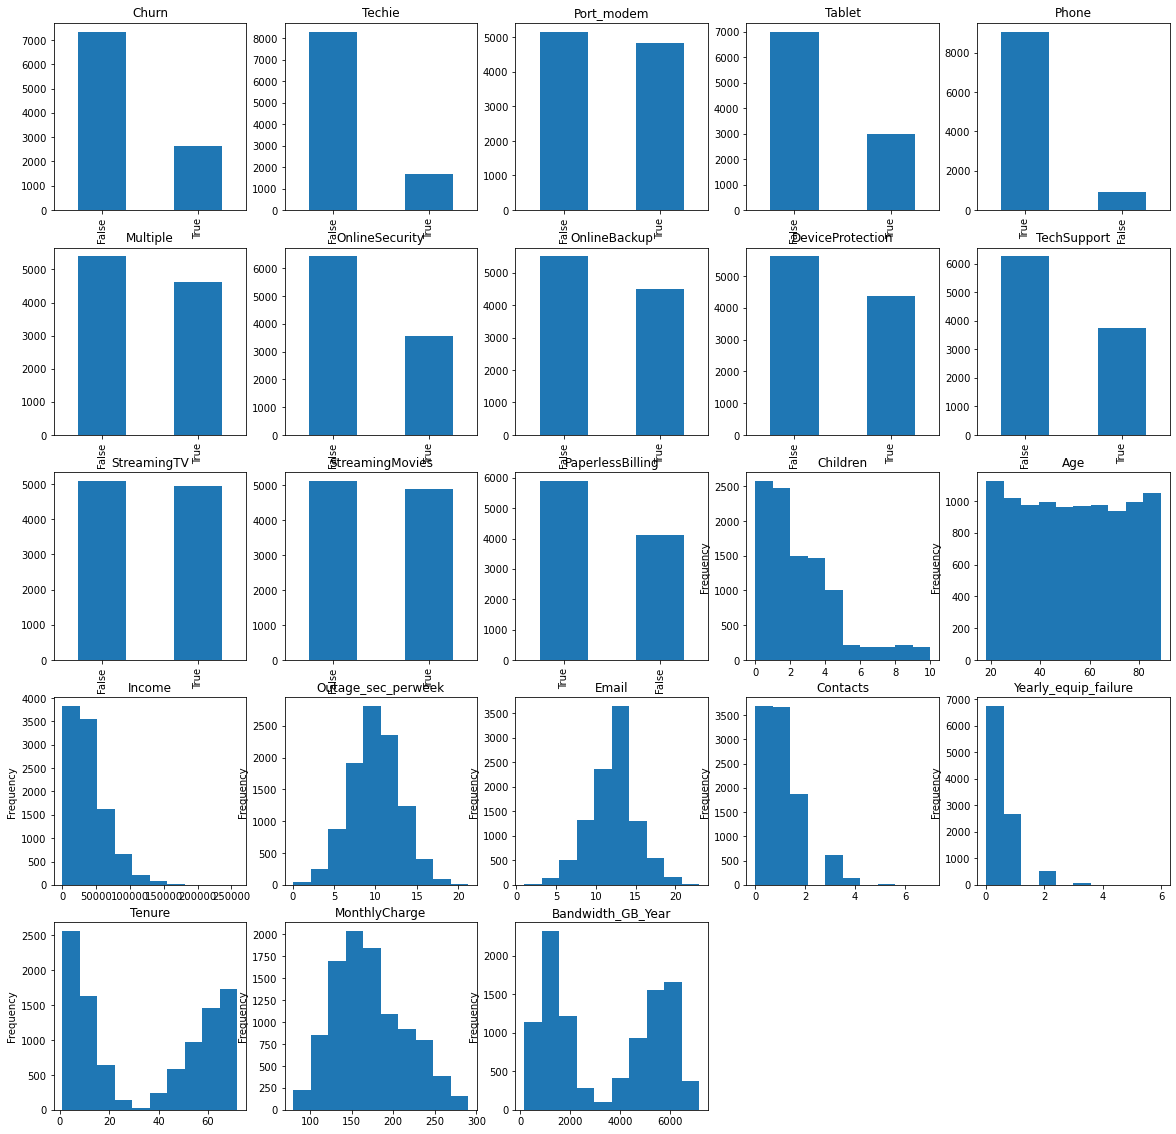

In [9]:
#Univariate visualizations
[2]
fig = plt.figure(figsize=(20,20)) 
fig_dims = (5, 5)

# Plot Boolean variable counts
plt.subplot2grid(fig_dims, (0, 0))
churn_df['Churn'].value_counts().plot(kind = 'bar', title='Churn')

plt.subplot2grid(fig_dims, (0, 1))
churn_df['Techie'].value_counts().plot(kind = 'bar', title='Techie')

plt.subplot2grid(fig_dims, (0, 2))
churn_df['Port_modem'].value_counts().plot(kind = 'bar', title='Port_modem')

plt.subplot2grid(fig_dims, (0, 3))
churn_df['Tablet'].value_counts().plot(kind = 'bar', title='Tablet')

plt.subplot2grid(fig_dims, (0, 4))
churn_df['Phone'].value_counts().plot(kind = 'bar', title='Phone')

plt.subplot2grid(fig_dims, (1, 0))
churn_df['Multiple'].value_counts().plot(kind = 'bar', title='Multiple')

plt.subplot2grid(fig_dims, (1, 1))
churn_df['OnlineSecurity'].value_counts().plot(kind = 'bar', title='OnlineSecurity')

plt.subplot2grid(fig_dims, (1, 2))
churn_df['OnlineBackup'].value_counts().plot(kind = 'bar', title='OnlineBackup')

plt.subplot2grid(fig_dims, (1, 3))
churn_df['DeviceProtection'].value_counts().plot(kind = 'bar', title='DeviceProtection')

plt.subplot2grid(fig_dims, (1, 4))
churn_df['TechSupport'].value_counts().plot(kind = 'bar', title='TechSupport')

plt.subplot2grid(fig_dims, (2, 0))
churn_df['StreamingTV'].value_counts().plot(kind = 'bar', title='StreamingTV')

plt.subplot2grid(fig_dims, (2, 1))
churn_df['StreamingMovies'].value_counts().plot(kind = 'bar', title='StreamingMovies')

plt.subplot2grid(fig_dims, (2, 2))
churn_df['PaperlessBilling'].value_counts().plot(kind = 'bar', title='PaperlessBilling')

#Histograms of continuous variables
plt.subplot2grid(fig_dims, (2, 3))
churn_df['Children'].plot(kind = 'hist', title='Children')

plt.subplot2grid(fig_dims, (2, 4))
churn_df['Age'].plot(kind = 'hist', title='Age')

plt.subplot2grid(fig_dims, (3, 0))
churn_df['Income'].plot(kind = 'hist', title='Income')

plt.subplot2grid(fig_dims, (3, 1))
churn_df['Outage_sec_perweek'].plot(kind = 'hist', title='Outage_sec_perweek')

plt.subplot2grid(fig_dims, (3, 2))
churn_df['Email'].plot(kind = 'hist', title='Email')

plt.subplot2grid(fig_dims, (3, 3))
churn_df['Contacts'].plot(kind = 'hist', title='Contacts')

plt.subplot2grid(fig_dims, (3, 4))
churn_df['Yearly_equip_failure'].plot(kind = 'hist', title='Yearly_equip_failure')

plt.subplot2grid(fig_dims, (4, 0))
churn_df['Tenure'].plot(kind = 'hist', title='Tenure')

plt.subplot2grid(fig_dims, (4, 1))
churn_df['MonthlyCharge'].plot(kind = 'hist', title='MonthlyCharge')

plt.subplot2grid(fig_dims, (4, 2))
churn_df['Bandwidth_GB_Year'].plot(kind = 'hist', title='Bandwidth_GB_Year')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

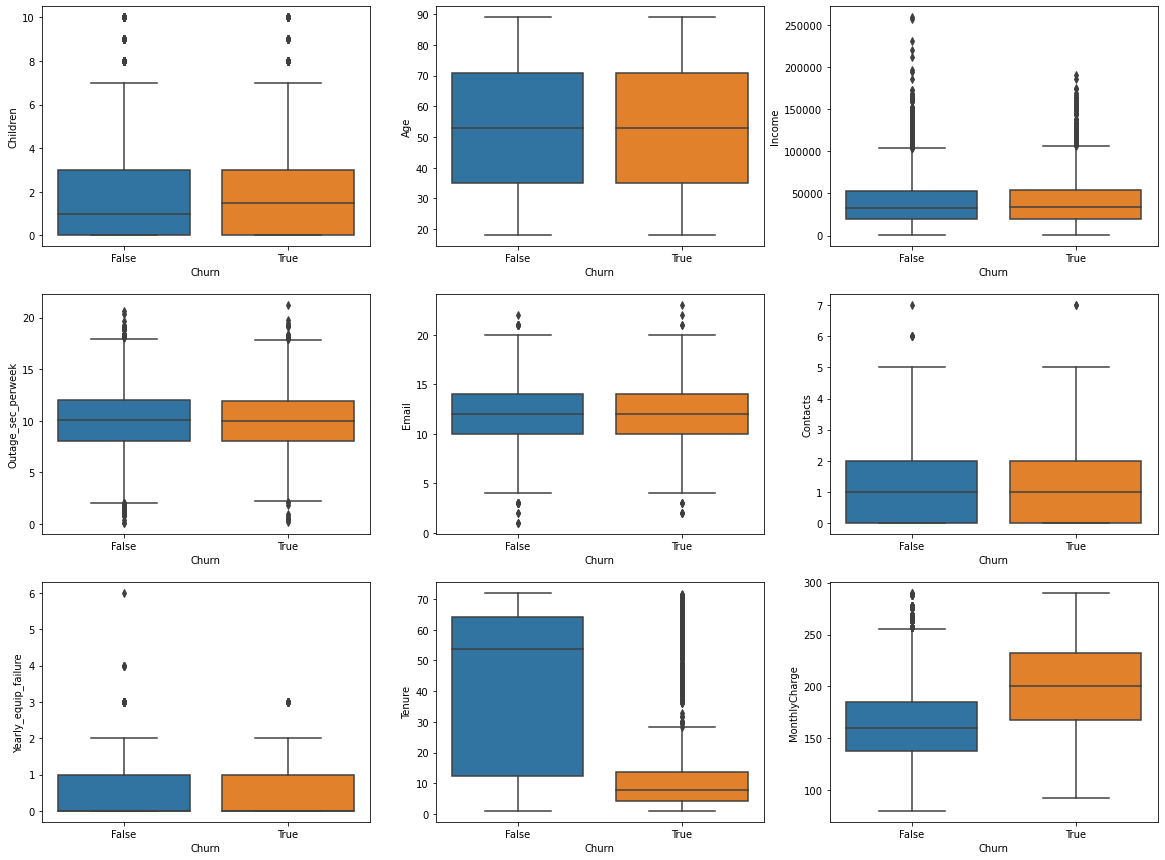

In [10]:
#Create bivariate plots of dependent variable vs all independent continuous variables
[4]
f, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.boxplot(x = "Churn", y = "Children", data = churn_df, ax = axes[0,0])
sns.boxplot(x = "Churn", y = "Age", data = churn_df, ax = axes[0,1])
sns.boxplot(x = "Churn", y = "Income", data = churn_df, ax = axes[0,2])
sns.boxplot(x = "Churn", y = "Outage_sec_perweek", data = churn_df, ax = axes[1,0])
sns.boxplot(x = "Churn", y = "Email", data = churn_df, ax = axes[1,1])
sns.boxplot(x = "Churn", y = "Contacts", data = churn_df, ax = axes[1,2])
sns.boxplot(x = "Churn", y = "Yearly_equip_failure", data = churn_df, ax = axes[2,0])
sns.boxplot(x = "Churn", y = "Tenure", data = churn_df, ax = axes[2,1])
sns.boxplot(x = "Churn", y = "MonthlyCharge", data = churn_df, ax = axes[2,2])

### C5. Prepared Data Set

In [11]:
#Export the prepared data set to an excel spreadsheet
churn_df.to_excel("Prepared_churn_data.xlsx")

### D1. Initial Model

In [12]:
[5]
model_1 = smf.logit('Churn ~ Bandwidth_GB_Year + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + PaperlessBilling + Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Tenure + MonthlyCharge', data = churn_df.astype(float)).fit()

model_1.summary()

Optimization terminated successfully.
         Current function value: 0.304405
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.4735
Time:                        20:10:11   Log-Likelihood:                -3044.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.1055      0.330    -12.458      0.000      -4.751      -3.460
Bandwidth_GB_Year        0.0025      0.000     14.874      0.000       0.002       0.003
Techie                   0.7397      0.084      8.798      0.000       0.575       0.905
Port_modem               0.1115      0.065      1.724      0.085      -0.015       0.238
Tablet                  -0.0495      0.070     -0.706      0.480      -0.187       0.088
Phone                   -0.2654      0.109     -2.431      0.015      -0.479      -0.051
Multiple                 0.7210      0.101      7.148      0.000       0.523       0.919
OnlineSecurity          -0.3610      0.070     -5.183      0.000      -0.498      -0.224
OnlineBackup             0.1777      0.085      2.096      0.036       0.012       0.344
DeviceProtection        -0.0183      0.073     -0.251      0.802      -0.161       0.124
TechSupport              0.1151      0.072      1.604      0.109      -0.026       0.256
StreamingTV              1.1973      0.131      9.131      0.000       0.940       1.454
StreamingMovies          1.6000      0.148     10.824      0.000       1.310       1.890
PaperlessBilling         0.0827      0.066      1.258      0.208      -0.046       0.212
Children                -0.0806      0.016     -5.007      0.000      -0.112      -0.049
Age                      0.0106      0.002      6.327      0.000       0.007       0.014
Income                7.032e-07   1.15e-06      0.610      0.542   -1.56e-06    2.96e-06
Outage_sec_perweek      -0.0025      0.011     -0.229      0.819      -0.024       0.019
Email                   -0.0008      0.011     -0.077      0.938      -0.022       0.020
Contacts                 0.0275      0.033      0.837      0.403      -0.037       0.092
Yearly_equip_failure    -0.0389      0.051     -0.760      0.448      -0.139       0.062
Tenure                  -0.2853      0.014    -19.985      0.000      -0.313      -0.257
MonthlyCharge            0.0075      0.002      3.409      0.001       0.003       0.012
========================================================================================
"""

#### Evaluate the accuracy of the unrefined model

In [13]:
[2]

#Defining the dependent and independent variables
Xtest1 = churn_df[['Bandwidth_GB_Year', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']]
ytest1 = churn_df[['Churn']]

Xtest1 = Xtest1.astype(float)
ytest1 = ytest1.astype(float)
 
#Performing predictions on the test datdaset
yhat1 = model_1.predict(Xtest1)
prediction1 = list(map(round, yhat1))

#Confusion matrix
cm = confusion_matrix(ytest1, prediction1)
print ("Confusion Matrix : \n", cm)
 
#Accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest1, prediction1))

Confusion Matrix : 
 [[6802  548]
 [ 882 1768]]
Test accuracy =  0.857


In [14]:
[2]
#Display a classification report of the initial model for evaluation
print(classification_report(ytest1, prediction1))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.90      7350
         1.0       0.76      0.67      0.71      2650

    accuracy                           0.86     10000
   macro avg       0.82      0.80      0.81     10000
weighted avg       0.85      0.86      0.85     10000



### D2. Justification of Model Reduction

#### Steps for model reduction:
1. Evaluate the p-value returned from the initial model for each variable. If the value is greater than 0.05, then it is possible that the coefficient produced is likely by chance and should be removed.
2. Create a correlation table and a heatmap to look at how highly the remaining variables are correlated to each other. Drop variables with higher than 0.5 correlation (25% shared variance).
3. Double check multicollinearity using variance inflation factor analysis. Variables with greater than 5 VIF should be removed.

Drop columns with a p-value greater than 0.05:

Port_modem, Tablet, DeviceProtection, TechSupport, PaperlessBilling, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure

In [15]:
#Update the dataframe to drop high p values
churn_df_drop_high_p = churn_df.drop(['Port_modem', 'Tablet', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure'], axis = 1)

#Print a correlation table
df_corr = churn_df_drop_high_p.corr()
display(df_corr)

,Children,Age,Churn,Techie,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
Children,1.000000,-0.029732,-0.004264,-0.006884,-0.001629,-0.021969,0.006937,-0.000297,-0.007106,0.003461,-0.005091,-0.009781,0.025585
Age,-0.029732,1.000000,0.005630,-0.007531,0.009521,-0.004674,-0.011213,0.003309,-0.000197,0.010125,0.016979,0.010729,-0.014724
Churn,-0.004264,0.005630,1.000000,0.066722,-0.026297,0.131771,-0.013540,0.050508,0.230151,0.289262,-0.485475,0.372938,-0.441669
Techie,-0.006884,-0.007531,0.066722,1.000000,-0.003081,-0.004661,-0.015300,0.004540,0.003436,-0.004298,-0.010041,0.007185,-0.009455
Phone,-0.001629,0.009521,-0.026297,-0.003081,1.000000,0.003398,0.001177,-0.003172,-0.012464,-0.002588,0.003256,-0.018977,0.001332
Multiple,-0.021969,-0.004674,0.131771,-0.004661,0.003398,1.000000,-0.002436,-0.002566,0.003097,0.004691,-0.010422,0.385979,0.006823
OnlineSecurity,0.006937,-0.011213,-0.013540,-0.015300,0.001177,-0.002436,1.000000,0.010338,0.001415,0.010575,0.002508,0.047734,0.021006
OnlineBackup,-0.000297,0.003309,0.050508,0.004540,-0.003172,-0.002566,0.010338,1.000000,-0.008043,0.001434,0.020802,0.259440,0.041740
StreamingTV,-0.007106,-0.000197,0.230151,0.003436,-0.012464,0.003097,0.001415,-0.008043,1.000000,-0.010516,0.002440,0.482312,0.054314
StreamingMovies,0.003461,0.010125,0.289262,-0.004298,-0.002588,0.004691,0.010575,0.001434,-0.010516,1.000000,-0.002574,0.608115,0.045600


<AxesSubplot:>

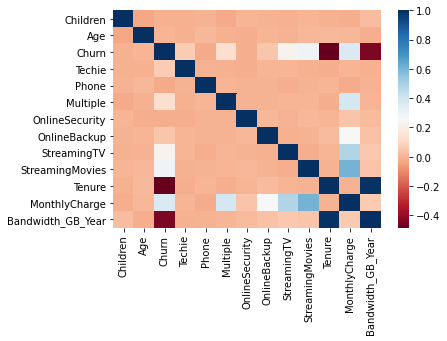

In [16]:
#Create a heatmap of correlations
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = "RdBu")

In [17]:
#Drop any variables with a correlation > .5
churn_df_drop_corr = churn_df_drop_high_p.drop(['Bandwidth_GB_Year'], axis = 1)

In [18]:
[3]
#Calculate and print variance inflation factors
churn_df_before = churn_df_drop_corr.drop('Churn', axis = 1)

X1 = sm.tools.add_constant(churn_df_before)
X1 = X1.astype(float)

#Create a series
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)

#Display the series
print('Data Before')
print('-'*100)
display(series_before)

Data Before
----------------------------------------------------------------------------------------------------


const              55.778241
Children            1.001557
Age                 1.001810
Techie              1.001020
Phone               1.001101
Multiple            1.838782
OnlineSecurity      1.009373
OnlineBackup        1.397229
StreamingTV         2.373111
StreamingMovies     3.136895
Tenure              1.001098
MonthlyCharge       5.730219
dtype: float64

In [19]:
#Update dataframe to drop columns with a VIF > 5
churn_df_drop_vif = churn_df_drop_corr.drop(['MonthlyCharge'], axis = 1)

In [20]:
#Update the model to reflect VIF reductions
[5]
model_2 = smf.logit('Churn ~ Techie + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Children + Age + Tenure', data = churn_df.astype(float)).fit()

model_2.summary()

Optimization terminated successfully.
         Current function value: 0.317721
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.4505
Time:                        20:11:58   Log-Likelihood:                -3177.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3255      0.158    -14.692      0.000      -2.636      -2.015
Techie              0.7239      0.082      8.785      0.000       0.562       0.885
Phone              -0.3000      0.107     -2.805      0.005      -0.510      -0.090
Multiple            1.1182      0.066     17.061      0.000       0.990       1.247
OnlineSecurity     -0.1276      0.066     -1.932      0.053      -0.257       0.002
OnlineBackup        0.5500      0.064      8.604      0.000       0.425       0.675
StreamingTV         2.0285      0.072     28.185      0.000       1.887       2.170
StreamingMovies     2.4390      0.074     32.934      0.000       2.294       2.584
Children           -0.0049      0.015     -0.331      0.741      -0.034       0.024
Age                 0.0024      0.002      1.574      0.115      -0.001       0.005
Tenure             -0.0778      0.002    -42.433      0.000      -0.081      -0.074
===================================================================================
"""

In [21]:
#Drop columns with a high p-value and re-run the model
#Dropping OnlineSecurity, Children, and Age
[5]
model_3 = smf.logit('Churn ~ Techie + Phone + Multiple + OnlineBackup + StreamingTV + StreamingMovies + Tenure', data = churn_df.astype(float)).fit()

model_3.summary()


Optimization terminated successfully.
         Current function value: 0.318043
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.4500
Time:                        20:12:13   Log-Likelihood:                -3180.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2541      0.130    -17.345      0.000      -2.509      -1.999
Techie              0.7252      0.082      8.808      0.000       0.564       0.887
Phone              -0.2990      0.107     -2.798      0.005      -0.509      -0.090
Multiple            1.1186      0.065     17.083      0.000       0.990       1.247
OnlineBackup        0.5490      0.064      8.594      0.000       0.424       0.674
StreamingTV         2.0260      0.072     28.183      0.000       1.885       2.167
StreamingMovies     2.4373      0.074     32.936      0.000       2.292       2.582
Tenure             -0.0777      0.002    -42.430      0.000      -0.081      -0.074
===================================================================================
"""

In [22]:
[2]
#Defining the dependent and independent variables
Xtest2 = churn_df[['Techie', 'Phone', 'Multiple', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']]
ytest = churn_df[['Churn']]

Xtest2 = Xtest2.astype(float)
ytest = ytest.astype(float)
 
#Performing predictions on the test datdaset
yhat2 = model_3.predict(Xtest2)
prediction2 = list(map(round, yhat2))

#Confusion matrix
cm = confusion_matrix(ytest, prediction2)
print ("Confusion Matrix : \n", cm)
 
#Accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction2))

Confusion Matrix : 
 [[6749  601]
 [ 899 1751]]
Test accuracy =  0.85


In [23]:
[2]
#Display a classification report of the reduced model for evaluation
print(classification_report(ytest, prediction2))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      7350
         1.0       0.74      0.66      0.70      2650

    accuracy                           0.85     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.85      0.85      0.85     10000



### D3. Reduced Multiple Regression Model

In [24]:
#Display a summary and classification report of the final logistic regression model
print(model_3.summary())
print(classification_report(ytest, prediction2))

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.4500
Time:                        20:12:22   Log-Likelihood:                -3180.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2541      0.130    -17.345      0.000      -2.509      -1.999
Techie              0.7252      0.082      8.808      0.000       0.564       0.887
Phone              -0.2990      

### E1. Model Comparison

• The logic of the variable selection technique: The general idea/goal of selecting variables was to limit them to only statistically relevant ones. This was accomplished by looking at how they interacted with each other, how removing them might affect the model's accuracy, and if their contributions to the model were by chance. After removing any that didn't fit within that goal, we can re-evaluate the model and compare it to the un-reduced version.
 
 • The model evaluation metric: The primary method used here to evaluate the model before and after reduction is found in the classification report. This contains three metrics: precision, recall, and f1-score. The weighted averages show a very slight decrease from 0.86 to 0.85 in only one metric (recall) from the initial to reduced models. Both precision and f1-score remained unchanged. However, that is not necessarily a bad thing, as we now know that statistically irrelevant variables have been removed, which has likely led to an increase in model robustness. 

### E2. Output and Calculations

See above for output and calculations.

### E3. Code

See above for the code.

### F1. Results
[5]

 • A regression equation for the reduced model (these produce the log-likelihood of an outcome):

 Techie: y = -2.25 + 0.73x
 
 Phone: y = -2.25 - 0.30x
 
 Multiple: y = -2.25 + 1.12x
 
 OnlineBackup: y = -2.25 + 0.55x
 
 StreamingTV: y = -2.25 + 2.03x
 
 StreamingMovies: -2.25 + 2.44x
 
 Tenure: y = -2.25 - 0.08x
 
 To calculate the predicted probability of an outcome given x, you have to use: exp(y)/(1+exp(y)) = probability
 
 • An interpretation of coefficients of the statistically significant variables of the model:
 
 Most of the coefficients produced by the model show a slight positive increase in the probability of churn. These include Techie, Multiple, OnlineBackup, StreamingTV, and StreamingMovies. One possible connection between these variables might be people classified as more "power users" than your average customer. People who tend to use many services and be more knowledgeable might be cross-shopping other providers to get the best deals. 
 
 The remaining variables with negative coefficients, Phone, and Tenure, show a slight decrease in the probability of churn in a customer. A possible explanation of Phone might be that customers with only one phone line (answered "no" to Multiple and potentially other variables) might not be heavy users that require many services. Their monthly bill likely doesn't change as much; therefore, they could be less inclined to change providers for a lower rate. For Tenure, the small negative coefficient could be explained by the simple idea that people become more comfortable with their service over time, making the idea of switching more of an obstacle. 
 
 • The statistical and practical significance of the model:
 
 Given the outputs of the classification report of the reduced model, there is significant statistical significance. With a weighted average accuracy of 85%, the final model is much better than a 50:50 guess. This is further bolstered by the removal of all statistically-insignificant variables. The practical significance is that this model can predict whether or not a customer will stay with the company with reasonably high accuracy. This can lead to further analysis on how to retain customers and keep/increase profits.
 
 • The limitations of the data analysis:
 
 The most significant limitation of this analysis is tied to the pseudo r-squared value produced by the models. While there was a reduction from beginning to end, the proportion of total variability unexplained by the model is still relatively high at 45% [6]. Even with all of the statistically insignificant variables removed, that number only decreased approximately 2.4%. A very possible explanation would be a missing variable or variables that might be needed for further reduction/explanation.

### F2. Recommendations

Using this model, companies could predict whether or not a customer will "churn" or leave them for a competitor. For further analysis, they could look at the impact of the remaining variables and create a plan that might counteract their effect. For example, customers that stream movies are more likely to leave, so offering them a temporary discount on that service could potentially keep them with the company longer.

### H. Sources of Third Party Code

2. "Logistic Regression Using Statsmodels" https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
3. "Multiple Regression Analysis in Python" https://www.youtube.com/watch?v=8DhvVs59It4
4. "Subplot for Seaborn Boxplot" https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot
5. "An Introduction to Logistic Regression in Python with statsmodels and scikit learn" https://levelup.gitconnected.com/an-introduction-to-logistic-regression-in-python-with-statsmodels-and-scikit-learn-1a1fb5ce1c13

### I. Sources

1. "Assumptions of Logistic Regression" https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/
6. Massaron L, Boschetti A. Regression Analysis with Python. Packt Publishing; 2016.